In [18]:
import sys
import ee

import geopandas as gpd
import pandas as pd

import eelib


In [19]:
MOA_TABLE = "../../testing_data/moa_script_tool_test.csv"

In [20]:
df = pd.read_csv(MOA_TABLE)
df

,system:index,00_Classes,01_Rank,02_Band,03_Value,.geo
0,0_17,Water:Upland,1.0,NDVI,1.908362,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,0_37,Water:Upland,2.0,VH,1.872446,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,0_13,Water:Upland,3.0,SAVI,1.866616,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,0_41,Water:Upland,4.0,VH_1,1.852306,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,0_6,Water:Upland,5.0,Red_Edge_3,1.832899,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...,...,...
961,20_28,Marsh:Swamp,42.0,Cirrus_1,0.307591,"{""type"":""MultiPoint"",""coordinates"":[]}"
962,20_21,Marsh:Swamp,43.0,Red_1,0.220784,"{""type"":""MultiPoint"",""coordinates"":[]}"
963,20_1,Marsh:Swamp,44.0,Blue,0.186104,"{""type"":""MultiPoint"",""coordinates"":[]}"
964,20_19,Marsh:Swamp,45.0,Blue_1,0.036308,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [21]:
df = df[df['01_Rank'] == 1]
df

,system:index,00_Classes,01_Rank,02_Band,03_Value,.geo
0,0_17,Water:Upland,1.0,NDVI,1.908362,"{""type"":""MultiPoint"",""coordinates"":[]}"
46,1_17,Water:Floodplain,1.0,NDVI,1.948696,"{""type"":""MultiPoint"",""coordinates"":[]}"
92,2_31,Water:Bog,1.0,SAVI_1,1.951561,"{""type"":""MultiPoint"",""coordinates"":[]}"
138,3_31,Water:Fen,1.0,SAVI_1,1.957162,"{""type"":""MultiPoint"",""coordinates"":[]}"
184,4_35,Water:Marsh,1.0,NDVI_1,1.871880,"{""type"":""MultiPoint"",""coordinates"":[]}"
230,5_35,Water:Swamp,1.0,NDVI_1,1.948498,"{""type"":""MultiPoint"",""coordinates"":[]}"
276,6_9,Upland:Floodplain,1.0,Water_vapor,1.583979,"{""type"":""MultiPoint"",""coordinates"":[]}"
322,7_45,Upland:Bog,1.0,SRTM_slope,1.383064,"{""type"":""MultiPoint"",""coordinates"":[]}"
368,8_37,Upland:Fen,1.0,VH,1.744225,"{""type"":""MultiPoint"",""coordinates"":[]}"
414,9_37,Upland:Marsh,1.0,VH,1.922644,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [22]:
bands = df['02_Band'].unique().tolist()
bands

['NDVI',
 'SAVI_1',
 'NDVI_1',
 'Water_vapor',
 'SRTM_slope',
 'VH',
 'Greenness',
 'Aerosols_1',
 'SAVI',
 'Blue_1',
 'Red_Edge_1_1']

In [28]:
# image = ee.Image('users/ryangilberthamilton/BC/williston/stacks/WillistonA_2018')
# pts = ee.FeatureCollection('users/ryangilberthamilton/BC/williston/fpca/willistonA_no_floodplain')

# samples = image.sampleRegions(**{
#     'collection': pts,
#     'scale': 10,
#     'tileScale': 8
# })

# task = ee.batch.Export.table.toDrive(
#     collection=samples,
#     description='Samples-Test',
#     fileFormat='CSV'
# )
# task.start()

In [29]:
SCORES = "../../testing_data/Samples-Test.csv"

In [30]:
df_scores = pd.read_csv(SCORES)
df_scores

,system:index,Aerosols,Aerosols_1,Blue,Blue_1,Brightness,Brightness_1,CDEM_elevation,CID,Cirrus,...,Wetness,Wetness_1,angle,angle_1,cDesc,clbl,nDesc,nlbl,rand_int,.geo
0,00000000000000000000_0,1119.0,1350.0,937.0,1144.0,3571.6733,4684.6930,737.0,1,11.0,...,190.5004,-98.4283,35.058480,35.057010,Bog,1,Wetland,1,495,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000000001_0,1093.0,1183.0,894.0,922.0,3222.0283,3481.6400,741.0,1,11.0,...,-494.0014,189.1003,35.095440,35.093970,Bog,1,Wetland,1,93,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000000002_0,1058.0,1186.0,893.0,907.0,2914.3074,3273.9583,737.0,1,11.0,...,-309.7043,325.8965,35.493607,35.492150,Bog,1,Wetland,1,215,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000000003_0,1034.0,1164.0,763.0,904.0,1908.3556,2899.4138,738.0,1,12.0,...,-139.7625,456.6934,35.492650,35.491188,Bog,1,Wetland,1,131,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000000004_0,1066.0,1261.0,851.0,1072.0,3278.9065,4425.0728,740.0,1,11.0,...,90.5842,-22.6650,35.106460,35.104992,Bog,1,Wetland,1,413,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,00000000000000000bb3_0,981.0,1154.0,694.0,844.0,645.2217,1023.5963,737.0,1,7.0,...,324.7265,454.3753,34.909134,34.907654,Water,6,Water,3,36,"{""type"":""MultiPoint"",""coordinates"":[]}"
2996,00000000000000000bb4_0,979.0,1168.0,692.0,869.0,659.8053,1150.4387,736.0,1,9.0,...,317.1210,459.0593,35.014820,35.013344,Water,6,Water,3,13,"{""type"":""MultiPoint"",""coordinates"":[]}"
2997,00000000000000000bb5_0,983.0,1167.0,722.0,860.0,688.9457,1034.1172,738.0,1,7.0,...,371.7482,513.2947,35.214775,35.213306,Water,6,Water,3,479,"{""type"":""MultiPoint"",""coordinates"":[]}"
2998,00000000000000000bb6_0,977.0,1168.0,694.0,871.0,675.4054,1129.0072,736.0,1,7.0,...,307.5322,495.5039,35.017414,35.015938,Water,6,Water,3,35,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [31]:
df_scores = df_scores[bands]
df_scores

,NDVI,SAVI_1,NDVI_1,Water_vapor,SRTM_slope,VH,Greenness,Aerosols_1,SAVI,Blue_1,Red_Edge_1_1
0,0.491092,0.421092,0.488354,1249.0,0.927410,-22.639223,1112.5612,1350.0,0.368272,1144.0,2002.0
1,0.435326,0.460678,0.681743,961.0,1.854334,-16.435980,570.1563,1183.0,0.271368,922.0,1092.0
2,0.406892,0.452339,0.683970,737.0,1.851340,-17.571083,450.9014,1186.0,0.240642,907.0,949.0
3,0.414517,0.407157,0.653493,726.0,1.602712,-17.681124,178.6009,1164.0,0.167746,904.0,1060.0
4,0.526551,0.442045,0.538396,1150.0,2.449065,-18.502554,1070.7756,1261.0,0.365541,1072.0,1658.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.253863,0.030223,0.122381,98.0,0.000000,-29.892948,-409.9453,1154.0,-0.033372,844.0,500.0
2996,-0.189979,0.042144,0.154073,86.0,3.332984,-26.676056,-380.1381,1168.0,-0.026280,869.0,495.0
2997,-0.390977,0.023370,0.090147,67.0,0.000000,-32.242560,-467.7160,1167.0,-0.060442,860.0,492.0
2998,-0.125257,0.033681,0.123885,70.0,3.207679,-22.371647,-362.0127,1168.0,-0.017552,871.0,461.0


In [51]:
df_scores.histogram()

AttributeError: 'DataFrame' object has no attribute 'histogram'

In [32]:
import matplotlib.pyplot as plt

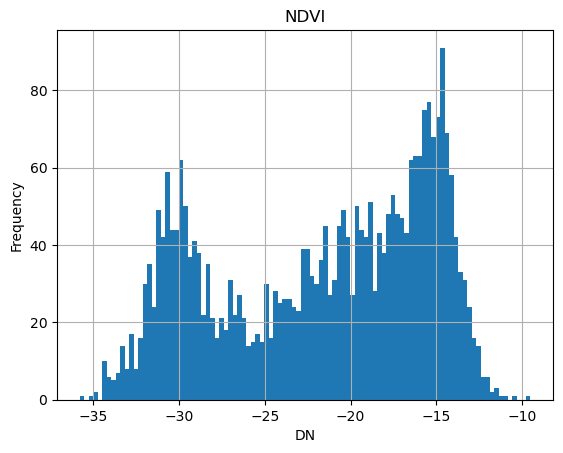

In [50]:
ndvi = df_scores['VH']
n, bins, patches = plt.hist(ndvi, 100)

plt.xlabel('DN')
plt.ylabel('Frequency')
plt.title('NDVI')

# plt.xlim(-1, 1)
# plt.ylim(0, 700)
plt.grid(True)

plt.show()

In [69]:
from typing import Union
import numpy as np
def hist_factory(series: pd.Series, title: str, bin: Union[str, int] = None):
    bin = 'auto' if bin is None else bin
    
    n, bins, patches = plt.hist(series, bin, rwidth=0.85)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)

    # plt.xlim(-1, 1)
    # plt.ylim(0, 700)
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 100) * 100 if maxfreq % 100 else maxfreq + 100)
    plt.grid(True)
    return n, bins, patches

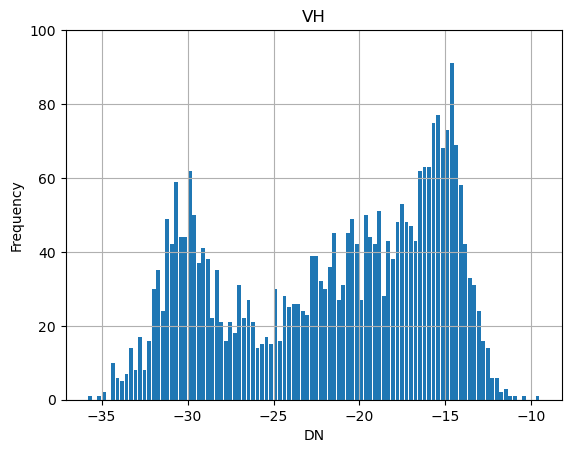

In [71]:
hist_factory(df_scores['VH'], 'VH', bin=100)
plt.savefig(f'VH.png', dpi=300)